In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
spike1 = np.genfromtxt('trace1.txt')
len1 = spike1.shape[0]
t = np.arange(0,100,1/20000)

Text(0.5, 0, 'Time, s')

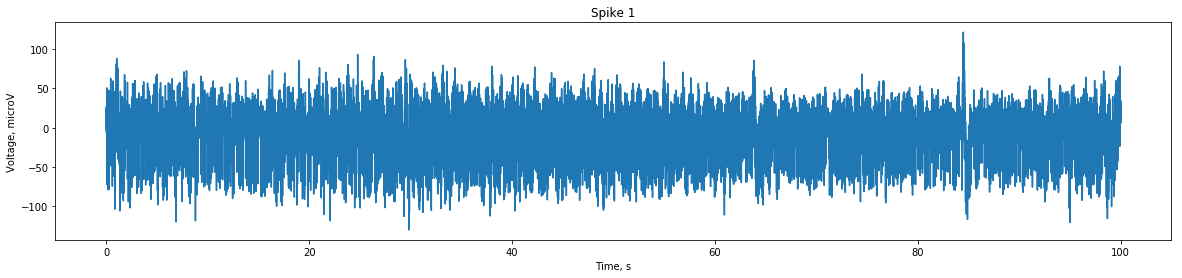

In [3]:
plt.figure(figsize = (20,4))
plt.plot(t, spike1)
plt.title('Spike 1')
plt.ylabel('Voltage, microV')
plt.xlabel('Time, s')

Text(0.5, 0, 'Time, s')

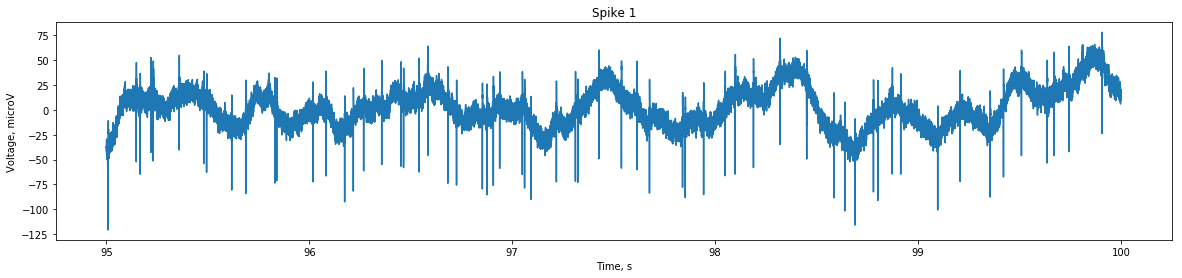

In [10]:
thr1 = len1 - 100000
thr2 = len1
plt.figure(figsize = (20,4))
plt.plot(t[thr1:thr2], spike1[thr1:thr2])
plt.title('Spike 1')
plt.ylabel('Voltage, microV')
plt.xlabel('Time, s')

Text(0.5, 0, 'Voltage, microV')

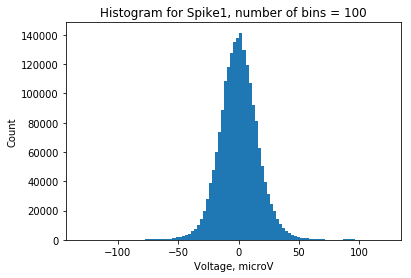

In [11]:
# hist, bin_edges = np.histogram(spike1, density=True)
n_bins = 100
plt.figure(figsize = (6,4))
plt.hist(spike1, bins = n_bins)
plt.title('Histogram for Spike1, number of bins = {}'.format(n_bins))
plt.ylabel('Count')
plt.xlabel('Voltage, microV')

In [12]:
hist, bin_edges = np.histogram(spike1, bins = n_bins)
delta = bin_edges[1]-bin_edges[0]
hist_n = hist/(sum(hist)*delta) 
x_n = bin_edges[1:] - delta/2

Text(0.5, 0, 'Voltage, microV')

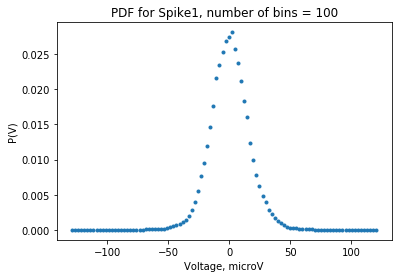

In [13]:
plt.figure(figsize = (6,4))
plt.plot(x_n, hist_n, '.')
plt.title('PDF for Spike1, number of bins = {}'.format(n_bins))
plt.ylabel('P(V)')
plt.xlabel('Voltage, microV')

In [20]:
arr = np.copy(spike1)
np.random.seed(10)
n_iter = 10
pdfs = np.empty((n_iter*2, n_bins))
# xs = np.empty((n_iter*2, n_bins))
for i in range(n_iter):
    np.random.shuffle(arr)
    pdfs[i],_ = np.histogram(arr[:int(len1/2)], bins = bin_edges, density = True)
    pdfs[i+n_iter],_ = np.histogram(arr[int(len1/2):], bins = bin_edges, density = True)

In [21]:
mean_pdf = pdfs.mean(axis = 0)
std_pdf = pdfs.std(axis = 0)

(1e-07, 0.31657389856033713)

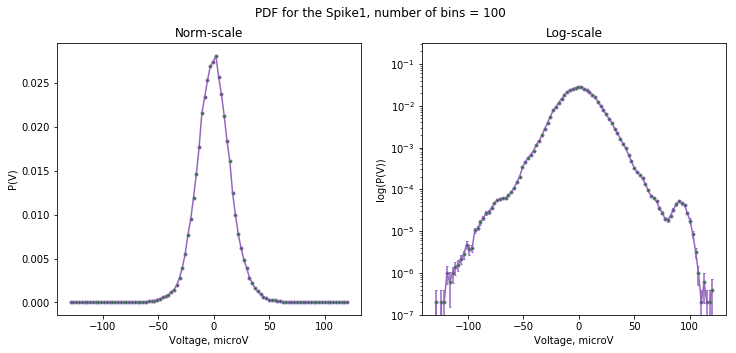

In [32]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
plt.suptitle('PDF for the Spike1, number of bins = {}'.format(n_bins))
# plt.plot(x_n, mean_pdf, '.',color = 'C2')
# plt.fill_between(x_n, mean_pdf-std_pdf, mean_pdf+std_pdf, alpha = 1)
ax[0].errorbar(x_n, mean_pdf, yerr = std_pdf, color = 'C4', marker='.', mfc='green', capsize = 1)
ax[0].set_title('Norm-scale')
ax[0].set_ylabel('P(V)')
ax[0].set_xlabel('Voltage, microV')

ax[1].errorbar(x_n, mean_pdf, yerr = std_pdf, color = 'C4', marker='.', mfc='green', capsize = 1)
# plt.fill_between(x_n, mean_pdf-std_pdf, mean_pdf+std_pdf, alpha = 0.5)
ax[1].set_yscale('log')
ax[1].set_title('Log-scale')
ax[1].set_ylabel('log(P(V))')
ax[1].set_xlabel('Voltage, microV')
ax[1].set_ylim(0.0000001)

In [33]:
# plt.figure(figsize = (6,4))
# # plt.plot(x_n, mean_pdf, '.',color = 'C2')
# plt.errorbar(x_n, mean_pdf, yerr = std_pdf, color = 'C4', marker='.', mfc='green', capsize = 1)
# # plt.fill_between(x_n, mean_pdf-std_pdf, mean_pdf+std_pdf, alpha = 0.5)
# plt.yscale('log')
# plt.title('Log-scale: PDF for Spike1, number of bins = {}'.format(n_bins))
# plt.ylabel('P(V)')
# plt.xlabel('Voltage, microV')

In [83]:
# plt.figure(figsize = (6,4))
# for i in range(n_iter*2):
#     plt.plot(x_n, pdfs[i])
# plt.title('PDF for Spike1, number of bins = {}'.format(n_bins))
# plt.ylabel('P(V)')
# plt.xlabel('Voltage, microV')

In [35]:
spike_thr = np.arange(-30, -75,-5)

n_spikes = []
for thr in spike_thr:
    down_spikes = []
    for i, V in enumerate(spike1):
        if (V < thr) & (spike1[i-1] > thr):
            down_spikes.append(i)
    n_spikes.append(len(down_spikes))

Text(0.5, 0, 'Voltage threshold, microV')

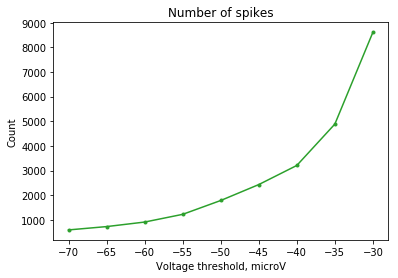

In [36]:
plt.figure(figsize = (6,4))
plt.plot(spike_thr, n_spikes, '.-',color = 'C2')
plt.title('Number of spikes')
plt.ylabel('Count')
plt.xlabel('Voltage threshold, microV')

In [37]:
T = 100
smooth_spike = np.empty(len1 - T)
for time in range(len1-T):
    smooth_spike[time] = sum(spike1[time:time+T])/T
smooth_t = t[int(T/2):-int(T/2)]

Text(0.5, 0, 'Time, s')

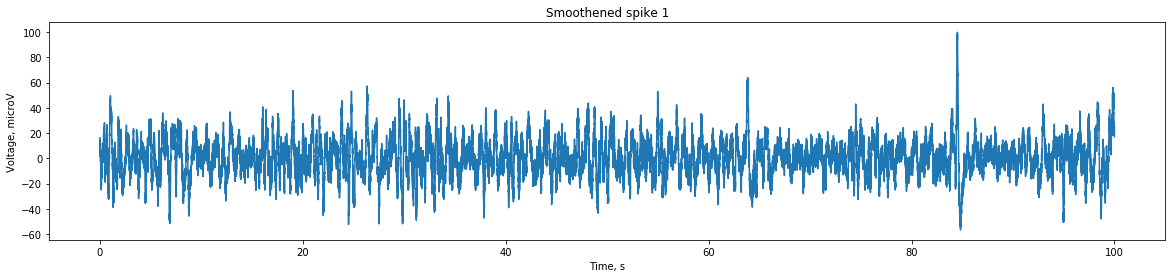

In [44]:
plt.figure(figsize = (20,4))
plt.plot(smooth_t, smooth_spike)
plt.title('Smoothened spike 1')
plt.ylabel('Voltage, microV')
plt.xlabel('Time, s')

In [90]:
new_spike1 = spike1[int(T/2):-int(T/2)] - smooth_spike

Text(0.5, 0, 'Time, s')

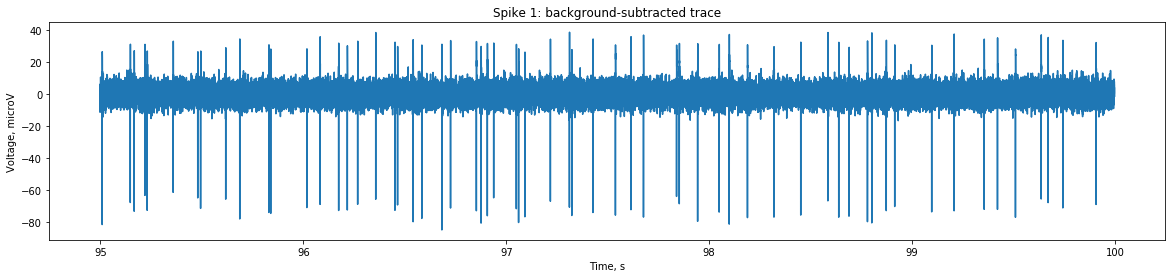

In [91]:
thr1 = len(smooth_t)-100000
thr2 = len(smooth_t)
plt.figure(figsize = (20,4))
plt.plot(smooth_t[thr1:thr2], new_spike1[thr1:thr2])
plt.title('Spike 1: background-subtracted trace')
plt.ylabel('Voltage, microV')
plt.xlabel('Time, s')

In [74]:
spike_thr = np.arange(-30, -75,-5)

n_smooth_spikes = []
for thr in spike_thr:
    down_spikes = []
    for i, V in enumerate(new_spike1):
        if (V < thr) & (new_spike1[i-1] > thr):
            down_spikes.append((i, V))
    n_smooth_spikes.append(len(down_spikes))

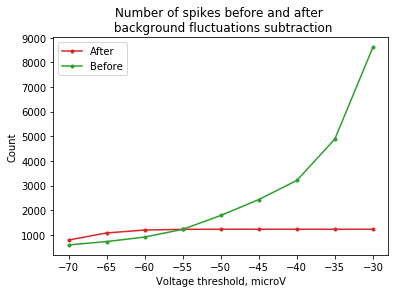

In [75]:
plt.figure(figsize = (6,4))
plt.plot(spike_thr, n_smooth_spikes, '.-',color = 'C3', label = 'After')
plt.plot(spike_thr, n_spikes, '.-',color = 'C2', label = 'Before')
plt.title('Number of spikes before and after \n background fluctuations subtraction')
plt.ylabel('Count')
plt.xlabel('Voltage threshold, microV')
plt.legend()

In [194]:
thr = -50
true_spikes = np.zeros(len(new_spike1), dtype=int)
for i in range(len(new_spike1)):
    if (new_spike1[i] < thr) & (new_spike1[i-1] > thr):
        true_spikes[i] += 1

In [310]:
T = 100
spike_thr = np.arange(0, -105,-10)
check_spikes = np.zeros((len(spike_thr),len(new_spike1)), dtype=int)
for k,thr in enumerate(spike_thr):
    for i in range(len(new_spike1)):
        if (spike1[i+int(T/2)] < thr) and (spike1[i+int(T/2)-1] > thr):
            check_spikes[k,i] += 1

In [311]:
TPR = np.empty(len(spike_thr))
FPR = np.empty(len(spike_thr))
PPV = np.empty(len(spike_thr))
FDR = np.empty(len(spike_thr))

for k in range(len(spike_thr)):
    curr_spike = check_spikes[k]
#     tp = sum(true_spikes & curr_spike)
#     tn = sum(np.logical_not(true_spikes,curr_spike))
    tp = 0
    tn = 0
    fn = 0
    fp = 0
    for i in range(len(true_spikes)):
#         print(true_spikes[i], curr_spike[i],tp,tn,fn,fp )
        if (true_spikes[i] == 1) and (curr_spike[i] == 1):
            tp += 1
        elif (true_spikes[i] == 0) and (curr_spike[i] == 0): 
            tn += 1
        elif (true_spikes[i] == 1) and (curr_spike[i] == 0):
            fn += 1
        elif (true_spikes[i] == 0) and (curr_spike[i] == 1):
            fp += 1
        else: print('something wrong!')
    TPR[k] = tp/(tp+fn)
    FPR[k] = fp/(fp+tn)
    PPV[k] = tp/(tp+fp)
    FDR[k] = fp/(fp+tp)
    

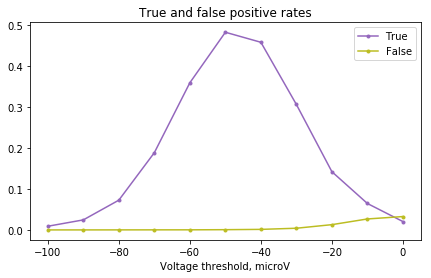

In [316]:
plt.figure(figsize = (7,4))
plt.title('True and false positive rates')
plt.plot(spike_thr, TPR, '.-',color = 'C4', label = 'True')
plt.plot(spike_thr, FPR, '.-',color = 'C8', label = 'False')
plt.xlabel('Voltage threshold, microV')
plt.legend()     

(-0.1, 1.1)

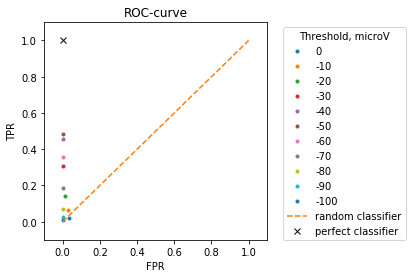

In [313]:
plt.figure(figsize = (4,4))
for i in range(len(spike_thr)):
    plt.plot(FPR[i], TPR[i], '.', label = '{}'.format(spike_thr[i]))
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--', label = 'random classifier')
plt.plot(0, 1, 'x', label = 'perfect classifier', color = 'k')
plt.title('ROC-curve')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend(title = 'Threshold, microV', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)

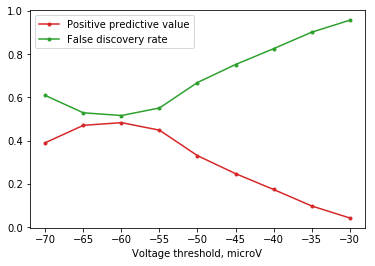

In [309]:
# plt.title('Positive and negative predictive value')
plt.plot(spike_thr, PPV, '.-',color = 'C3', label = 'Positive predictive value')
plt.plot(spike_thr, FDR, '.-',color = 'C2', label = 'False discovery rate')
plt.xlabel('Voltage threshold, microV')
plt.legend()

In [306]:
# win = 0
# T = 100
# spike_thr = np.arange(-30, -75,-5)

# for k,thr in enumerate(spike_thr):
#     for i in range(len(new_spike1)):
#         if (spike1[i+int(T/2)] < thr) & (spike1[i+int(T/2)-1] > thr):
#             if i in true_spikes:
#                 true[k] += 1
#             else: false[k] += 1

# new_false = false/(false+true)
# new_true = true/(false+true)

In [166]:
# thr1 = len(smooth_t)-2000
# thr2 = len(smooth_t)-1800
# plt.figure(figsize = (20,4))
# plt.title('Background-subtracted vs initial trace: a spike example')
# plt.plot(smooth_t[thr1:thr2], spike1[int(T/2)+thr1:int(T/2)+thr2],'.', label = 'Initial signal')
# plt.plot(smooth_t[thr1:thr2], new_spike1[thr1:thr2],'.',label = 'Baseline-corrected signal')
# plt.hlines(-50, smooth_t[thr1],smooth_t[thr2], label = 'Threshold -50 microV')
# plt.ylabel('Voltage, microV')
# plt.xlabel('Time, s')
# plt.legend(fontsize = 12)

In [113]:
# plt.figure(figsize=(20,4))
# plt.plot(true_spikes, [1]*len(true_spikes), '.', label = 'true')
# plt.plot(check, [0.999]*len(check), '.', label = 'all')
# plt.xlim(1270,1360)
# plt.ylim(0.96,1.04)
# plt.legend()

In [307]:
# plt.title('Positive and negative predictive value')
# plt.plot(spike_thr, new_true, '.-',color = 'C3', label = 'Positive')
# plt.plot(spike_thr, new_false, '.-',color = 'C2', label = 'Negative')
# plt.xlabel('Voltage threshold, microV')
# plt.legend()